### Import Required Packages

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the CSV & Examine the Data

In [6]:
data = pd.read_csv("/users/Gavin/Desktop/hotel_bookings.csv")

In [12]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [13]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [15]:
data.shape

(119390, 32)

### Data Cleaning

In [16]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We can see that the columns "agent" and "company" have a lot of null values compared to any other columns. So for simplicity sake we are going to remove these columns.

In [17]:
data = data.drop(columns=['agent','company'])

In [21]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


As you can see, the "agent" and "company" columns are no longer present in our dataset.

### Plotting the Type of Hotel Using a Pie Chart

Since there are only 2 types of hotels (city and resort), an easy way to visualize the difference is using a pie chart.

([<matplotlib.patches.Wedge at 0x1043f9eb8>,
 [Text(-0.9487940151166251, 0.5565877440968977, 'City Hotel'),
  Text(1.2075560192393415, -0.7083844015778686, 'Resort Hotel')],
 [Text(-0.5175240082454319, 0.30359331496194414, '66.4%'),
  Text(0.776286012368148, -0.45538997244291557, '33.6%')])

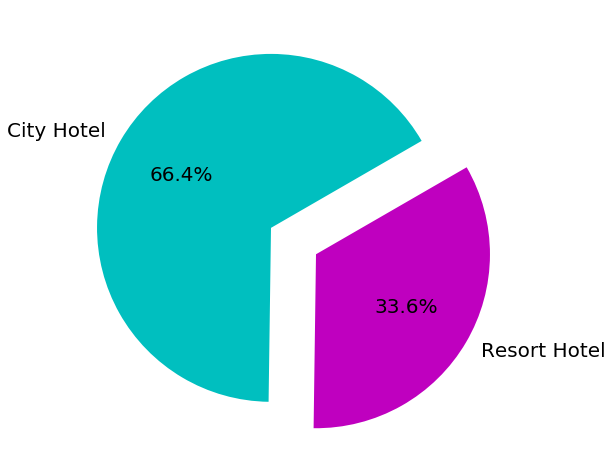

In [24]:
plt.rcParams['figure.figsize'] = 8,8
chartlabels = data['hotel'].value_counts().index.tolist()
sizes = data['hotel'].value_counts().tolist()
separation = (0,0.3)
color = ['c','m']

plt.pie(sizes, explode=separation, labels=chartlabels, colors=color,
       textprops={'fontsize':20},autopct='%1.1f%%',startangle=30)

According to the pie chart, it looks like a large number of people prefer city hotels over resort hotels. This may be due to the pricing/availability of city hotels.

### Comparing Cancellation Rate Between Hotel Type

We are going to use a bar plot to compare the cancellation rate amongst both city and resort hotels.

Text(0.5, 1.0, 'Cancellation Rates Between City and Resort Hotels')

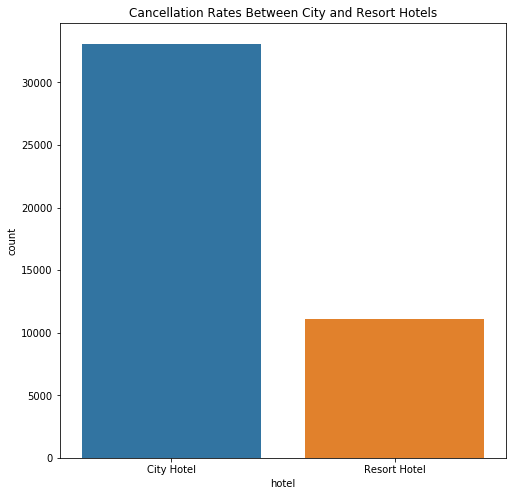

In [36]:
data['is_canceled'] = data.is_canceled.replace([1,0],['canceled','not_canceled'])

classification = ['is_canceled','hotel']
type_canceled = data[classification]
canceled_hotel = type_canceled[type_canceled['is_canceled']=='canceled'].groupby(['hotel']).size().reset_index(name='count')

sns.barplot(data=canceled_hotel,x='hotel',y='count').set_title('Cancellation Rates Between City and Resort Hotels')

The cancellation rate for city hotels appear to be much higher than the cancellation rate for resort hotels. There are a number of reasons that this is the case. Resort hotels might be more difficult to cancel. This discrepancy might also be caused by the fact that city hotels are a lot more prevalant than resort hotels, so their cancellation rate is likely going to be higher no matter what.

### Comparing Number of Arrivals Per Month 

In [38]:
arrival_lst = ['hotel','arrival_date_year','arrival_date_month','arrival_date_day_of_month']
arrival_period = data[arrival_lst]

Text(0, 0.5, 'Arrivals')

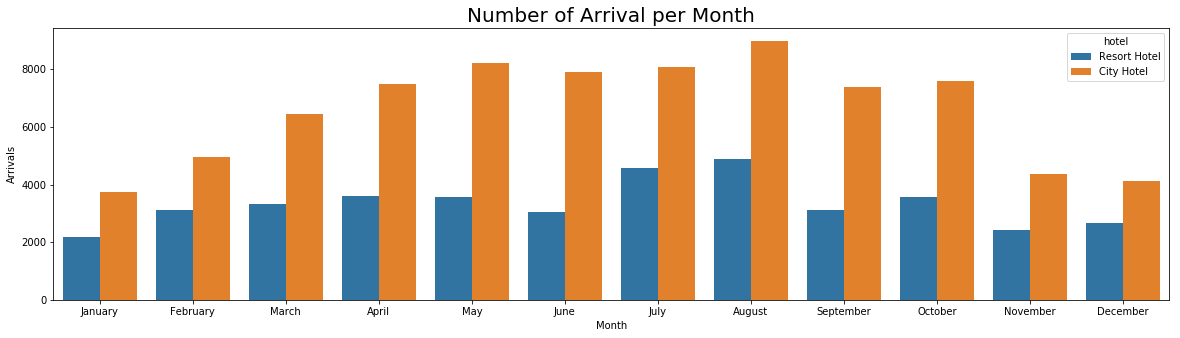

In [40]:
plt.figure(figsize=(20,5))
sns.countplot(data=arrival_period,x='arrival_date_month',hue='hotel',order=['January','February','March',
                                                                            'April','May','June','July',
                                                                           'August','September','October',
                                                                           'November','December']).set_title('Number of Arrival per Month',
                                                                                                             fontsize=20)

plt.xlabel('Month')
plt.ylabel('Arrivals')

It looks like city hotels have more arrivals every month than resort hotels (as expected). Arrivals in city hotels seem to begin to increase around the spring, and peak in the summer-fall months. This may be caused by more people traveling/going on vacation during the summer.

### Comparing Number of Arrivals Per Day (avg. across all months) 

Text(0, 0.5, 'Arrivals')

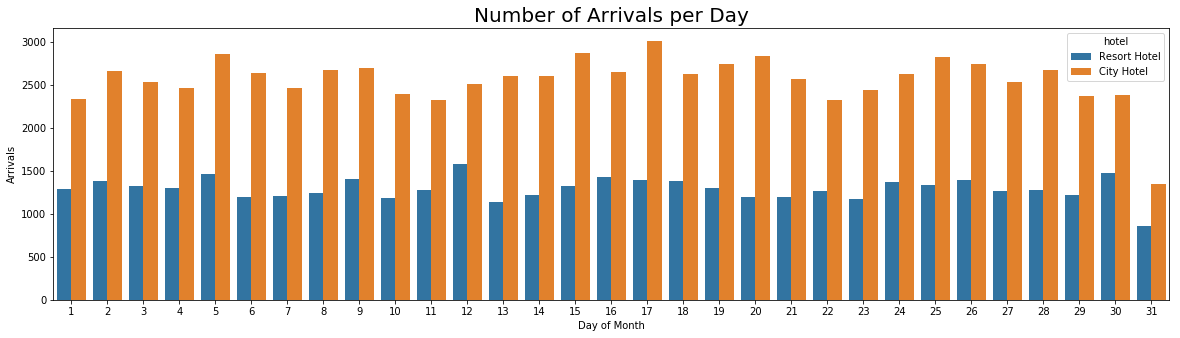

In [43]:
plt.figure(figsize=(20,5))
sns.countplot(data=arrival_period,x='arrival_date_day_of_month',hue='hotel').set_title('Number of Arrivals per Day',
                                                                                      fontsize=20)
plt.xlabel('Day of Month')
plt.ylabel('Arrivals')

This time, it looks like the number of arrivals for both city and resort hotels are pretty even distributed across the entire month. So we can assume that the month of the year is more important than the actual day of the month. Note: arrivals on the 31st are lower than all the other days, and this is likely due to every other month having a 31st day, which makes the data abnormally lower.  

### Where are most visitors from?

We are going to use plotly express to examine where hotel vistors are from. 

In [45]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'